In [1]:
# モジュールとかもろもろ準備

import matplotlib.pyplot as plt
import numpy as np
import sys
import os

current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, '../conf/'))
sys.path.append(os.path.join(current_dir, '../crawl/'))
sys.path.append(os.path.join(current_dir, '../data_preparing/'))


# my module
import loader
import boatrace_crawler_conf
import race_list_crawler

In [2]:
# 過去のレース結果をdfとして取得
the_race_result_df = loader.main()
print(the_race_result_df.columns)

/Users/grice/mywork/boatrace/src/analyze/../data_preparing/loader.py:357: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  race_results_supplementary_df = pd.concat(race_results_supplementary_df_list)


Index(['date', 'venue', 'raceNumber', 'weather', 'windDir', 'windPow',
       'waveHight', 'ruler', 'win', 'winOdds',
       ...
       'place3Ratio_national_3', 'place3Ratio_national_4',
       'place3Ratio_national_5', 'place3Ratio_national_6',
       'place3Ratio_local_1', 'place3Ratio_local_2', 'place3Ratio_local_3',
       'place3Ratio_local_4', 'place3Ratio_local_5', 'place3Ratio_local_6'],
      dtype='object', length=304)


http://boatrace.jp/owpc/pc/race/racelist?rno=11&jcd=07&hd=20191013
['永\u3000井\u3000\u3000\u3000\u3000源', '牧\u3000\u3000\u3000\u3000宏\u3000次', '木\u3000村\u3000\u3000浩\u3000士', '後\u3000藤\u3000\u3000\u3000\u3000浩', '大\u3000池\u3000\u3000佑\u3000来', '藤\u3000井\u3000\u3000\u3000\u3000徹']


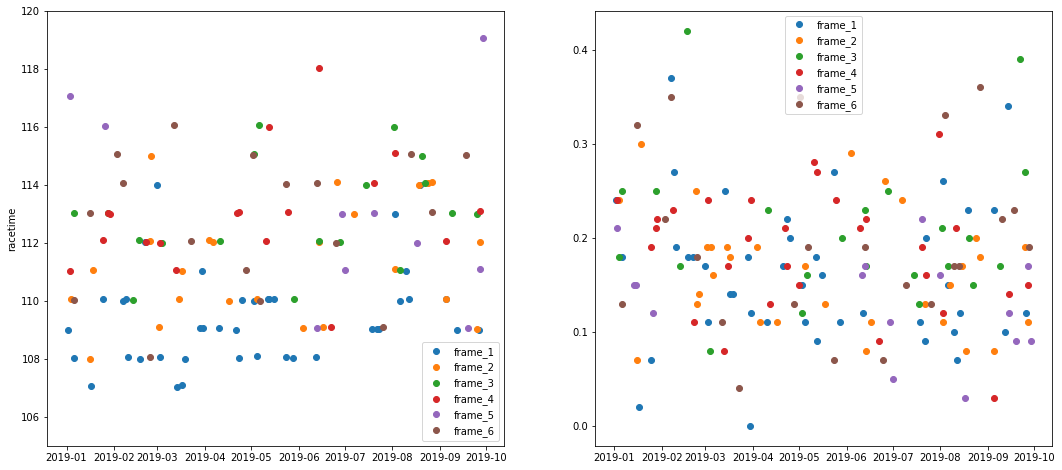

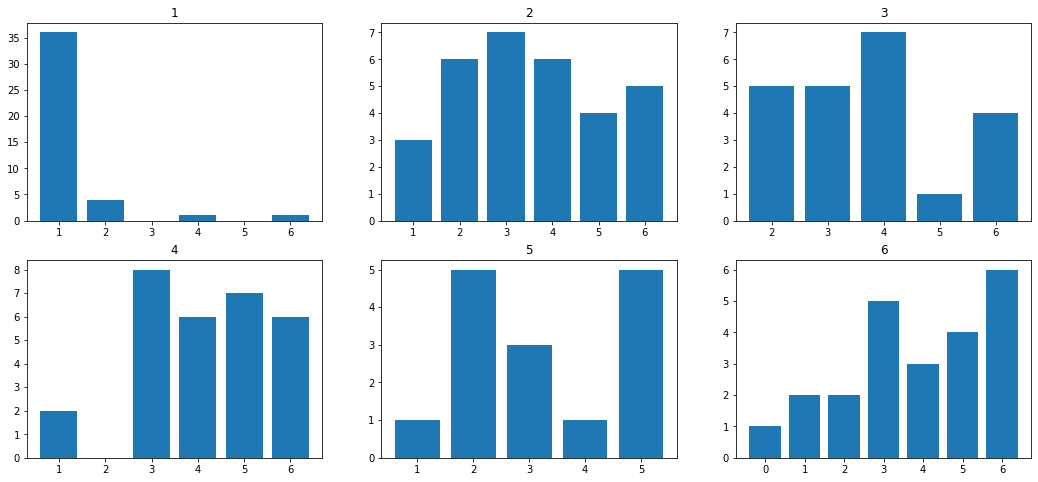

In [66]:
#### 下記inputを指定して実行 ###

# ----------input------------
the_rno = "11R"
the_jcd = "蒲　郡"
the_hd = "2019/10/13"
# ---------------------------

the_race_information_df = race_list_crawler.main(the_rno, the_jcd, the_hd)

racer_list = [the_race_information_df["racer_{0}".format(i)].values[0] for i in range(1, 7)]

print(racer_list)

# date vs racetime (該当frameのみ)およびdate vs start time (該当frameのみ)
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(18,8))

# 各レーサー該当枠番におけるこれまでの順位を棒グラフで表示
fig2, axes = plt.subplots(2, 3, figsize=(18, 8))

i = 1
for ax, racer in zip(axes.flatten(), racer_list):
    
    # 人・枠でfilterしたdf
    filtered_df = the_race_result_df[the_race_result_df["racerName_{0}".format(i)]==racer]
    
    # fig用
    axL.plot_date(filtered_df["date"], filtered_df["raceTime_{0}".format(i)], label="frame_{0}".format(i))    
    axR.plot_date(filtered_df["date"], filtered_df["startTime_{0}".format(i)], label="frame_{0}".format(i))
    
    # 棒グラフ用
    rank_count = filtered_df["rank_{0}".format(i)].value_counts(sort=False)
    ax.bar(rank_count.index.values, rank_count.values)
    ax.set_title(i)
    
    i = i + 1

axL.set_ylim(105, 120)
axL.set_ylabel("racetime")
ax2.set_ylabel("starttime")
axL.legend()
axR.legend()
plt.show()
